# hands on machine learning by Aurélien Géron
* conda activate gym

In [2]:
import gym

In [4]:
env = gym.make("CartPole-v0")

In [5]:
obs = env.reset()

In [6]:
obs

array([-0.03460069, -0.04873563, -0.0071765 , -0.00307883])

In [7]:
env.render()

True

In [8]:
img = env.render(mode="rgb_array")

In [9]:
img.shape

(400, 600, 3)

In [10]:
env.action_space

Discrete(2)

In [11]:
action = 1

In [12]:
obs, reward, done, info = env.step(action)

In [13]:
obs

array([-0.0355754 ,  0.1464885 , -0.00723808, -0.29801737])

In [14]:
reward

1.0

In [15]:
done

False

In [16]:
info

{}

In [17]:
env.render()

True

In [18]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1
totals = []


In [19]:
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(1000):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib
import matplotlib.animation as animation

In [22]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(42.332, 8.87230387216308, 24.0, 72.0)

In [26]:
env.render()

True

In [27]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # 문제없음, OpenAI 짐의 렌더링 함수를 사용합니다
except Exception:
    openai_cart_pole_rendering = False  # 가능한 X 서버가 없다면, 자체 렌더링 함수를 사용합니다

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # OpenAI 짐의 렌더링 함수를 사용합니다
        return env.render(mode="rgb_array")
    else:
        # Cart-Pole 환경을 위한 렌더링 (OpenAI 짐이 처리할 수 없는 경우)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # 파랑 초록 빨강
        pole_col = 0x669acc # 파랑 초록 빨강

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

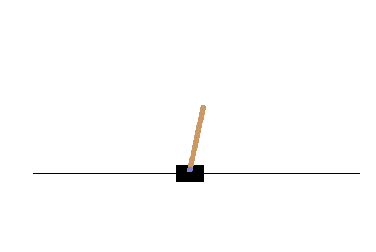

In [30]:
plot_cart_pole(env, obs)

In [34]:
video = plot_animation(frames, figsize=(6,4))
HTML(video.to_html5_video())

NameError: name 'plot_animation' is not defined